# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv("key.env")


True

In [3]:
# Retrieve API key and store as Python variable
api_key = os.getenv("QUANDL_API_KEY")
#type(api_key)


## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
BTC = 1.2
ETH = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [6]:
# Fetch current BTC price
response_data_eth = requests.get(eth_url)
my_eth_json = response_data_eth.json()
my_eth = my_eth_json ["data"]["1027"]["quotes"]["USD"]["price"]
my_eth

1398.47

In [7]:
# Fetch current BTC price
response_data_btc = requests.get(btc_url)
my_btc_json = response_data_btc.json()

# Fetch current ETH price
response_data_eth = requests.get(eth_url)
my_eth_json = response_data_eth.json()

# Compute current value of my crpto
my_btc = my_btc_json ["data"]["1"]["quotes"]["USD"]["price"] * BTC
my_btc

my_eth = my_eth_json ["data"]["1027"]["quotes"]["USD"]["price"] * ETH
my_eth

# Print current crypto wallet balance
print(f"The current value of your {BTC} BTC is ${my_btc:0.2f}")
print(f"The current value of your {ETH} ETH is ${my_eth:0.2f}")

The current value of your 1.2 BTC is $44629.20
The current value of your 5.3 ETH is $7411.89


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [9]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")

# Create the Alpaca API object
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [10]:
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [11]:
# Retrieve API key and store as Python variable
api_key = os.getenv("ALPACA_API_KEY")
type(api_key)

str

In [12]:
# Retrieve API key and store as Python variable
api_key = os.getenv("ALPACA_SECRET_KEY")
type(api_key)

str

In [13]:
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [14]:
# Format current date as ISO format
from datetime import date
today = date.today().isoformat()
print("Today's date:", today)

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today
).df



# Preview DataFrame
df_portfolio.head()


Today's date: 2021-01-29


AGG                                        SPY  \
                             open    high      low   close    volume    open   
2020-09-08 00:00:00-04:00  118.34  118.46  118.200  118.23  11938683  336.71   
2020-09-09 00:00:00-04:00  118.39  118.39  118.040  118.19  10977908  337.55   
2020-09-10 00:00:00-04:00  118.09  118.29  118.015  118.23   7983732  342.15   
2020-09-11 00:00:00-04:00  118.42  118.49  118.240  118.36  11853287  335.82   
2020-09-14 00:00:00-04:00  118.47  118.49  118.310  118.37  11279340  337.49   

                                                                
                             high       low   close     volume  
2020-09-08 00:00:00-04:00  342.64  332.8800  333.26  196953429  
2020-09-09 00:00:00-04:00  342.46  336.6100  339.76  156548054  
2020-09-10 00:00:00-04:00  342.53  332.8500  333.92  148070421  
2020-09-11 00:00:00-04:00  336.97  331.0000  334.08  140223556  
2020-09-14 00:00:00-04:00  340.38  334.2208  338.42  110083883

In [15]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"][0])
spy_close_price = float(df_portfolio["SPY"]["close"][0])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.23
Current SPY closing price: $333.26


In [16]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy


# Print current value of share
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")


The current value of your 200 AGG shares is $23646.00
The current value of your 50 SPY shares is $16663.00


### Savings Health Analysis

In [17]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
crypto = my_btc + my_eth
shares = my_agg_value + my_spy_value

df_savings = pd.DataFrame([crypto, shares],index = ["crypto", "shares"], columns = ["amount"])

# Display savings DataFrame
df_savings.head()

,amount
crypto,52041.091
shares,40309.000


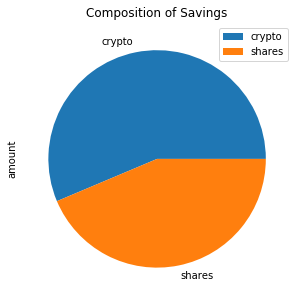

In [18]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Savings", figsize=(5,5))

In [19]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = (sum(df_savings ["amount"]))


# Validate saving health

#display(df_savings)

if total_savings > emergency_fund:
    print("congratulations for having enough money in this fund.")
elif total_savings == emergency_fund:
    print("congratulats on reaching this financial goal")
elif total_savings < emergency_fund:
    print(f"[You are {total_savings - emergency_fund} dollars away]")



congratulations for having enough money in this fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [20]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [21]:
# Get 5 years' worth of historical data for SPY and AGG
ticker_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
ticker_data.head()

AGG                                        \
                             open      high      low   close     volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                              SPY                                     
                             open    high     low   close     volume  
2015-08-07 00:00:00-04:00  208.16  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  209.28  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  208.98  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  207.11  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  208.73  209.55  208.01  208.63   77197796

In [22]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims = 30

In [23]:
# Printing the simulation input data
ticker_data.head()

AGG                                        \
                             open      high      low   close     volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                              SPY                                     
                             open    high     low   close     volume  
2015-08-07 00:00:00-04:00  208.16  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  209.28  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  208.98  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  207.11  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  208.73  209.55  208.01  208.63   77197796

In [24]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC = MCSimulation(
    portfolio_data = ticker_data,
    num_simulation = 1000,
    num_trading_days = 252*num_sims
)

MC.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009368,0.998661,0.998333,1.005782,0.988677,0.998420,0.993879,0.996983,0.994756,1.000919,...,1.007795,1.006321,0.999383,1.001411,1.007550,1.001352,0.999807,0.998390,0.994397,0.995108
2,1.007496,0.999177,0.994852,1.010952,0.982278,0.988557,0.992739,0.993761,0.991131,0.993047,...,1.001271,1.010744,1.008036,0.994429,1.009210,1.005284,0.997297,1.007860,0.994316,0.990911
3,1.006212,0.999335,1.005077,1.009232,0.977864,0.984625,0.999956,0.992447,0.995496,1.000693,...,1.009096,0.996685,1.006309,0.992224,1.011892,1.007277,0.987000,1.014666,1.000071,0.977276
4,0.999608,0.995648,0.991370,1.011139,0.979629,0.983169,0.998700,0.995547,0.991342,1.001384,...,1.016508,1.000800,0.994441,0.996485,1.008430,1.010777,0.975137,1.024404,0.999488,0.982193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.399102,5.059027,8.272745,5.939566,6.094143,4.680946,7.255374,13.286689,2.722606,7.891783,...,19.236036,4.842183,6.853571,3.431629,12.938695,4.020973,3.927314,3.645394,6.276749,6.364825
7557,4.374911,5.059179,8.210018,5.885776,6.120520,4.686447,7.230688,13.417473,2.691452,7.912994,...,19.381868,4.821063,6.754657,3.429357,13.009788,4.010540,3.935036,3.657365,6.203494,6.345135
7558,4.376720,5.053872,8.217379,5.902762,6.078474,4.705001,7.286218,13.475519,2.703086,7.902435,...,19.448345,4.790047,6.809015,3.426395,13.044225,4.017359,3.923718,3.667879,6.141146,6.374059
7559,4.399023,5.095856,8.265870,5.836867,6.128863,4.726607,7.365186,13.450261,2.708478,7.878743,...,19.511078,4.816233,6.816671,3.454520,13.012104,4.050134,3.907634,3.681276,6.192017,6.348587


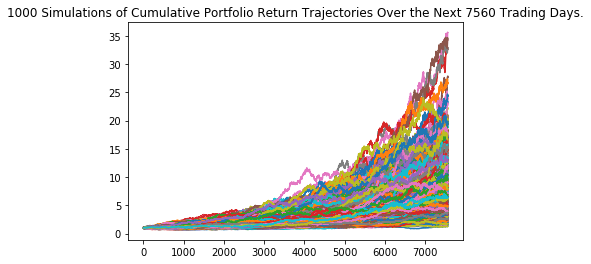

In [25]:
# Plot simulation outcomes
line_plot = MC.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_sim_plot.png", bbox_inches="tight")

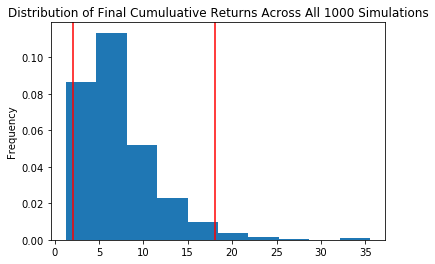

In [26]:
# Plot probability distribution and confidence intervals
dist_plot = MC.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [27]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           1000.000000
mean               7.342801
std                4.325243
min                1.265188
25%                4.323437
50%                6.484593
75%                8.984794
max               35.549328
95% CI Lower       2.108240
95% CI Upper      18.103349
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [28]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $42164.79 and $362066.99


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [29]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $63247.19 and $543100.48


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
num_sims_5Y = 5

In [31]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5Y = MCSimulation(
    portfolio_data = ticker_data,
    num_simulation = 1000,
    num_trading_days = 252*num_sims_5Y
)

MC_5Y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997824,0.998341,1.006694,0.993703,0.995640,0.996246,1.002502,0.978333,1.000813,0.991353,...,1.008219,1.002562,0.993564,0.999115,1.003547,1.002519,0.999673,1.009162,0.997837,1.000103
2,1.004014,0.993925,1.008430,0.995825,0.997003,0.995111,1.002832,0.976909,1.006872,0.994820,...,1.015018,1.003813,1.002446,0.995115,1.001357,1.006473,0.998417,1.009627,1.005154,1.007128
3,0.999818,0.982499,1.011132,1.001402,1.002472,1.004648,0.998959,0.974520,1.017615,0.995689,...,1.025162,0.996611,1.003625,0.998635,1.002638,1.005841,0.992542,1.009270,0.991237,1.009567
4,0.995623,0.973164,1.012020,0.985758,1.007402,1.004425,0.992742,0.982506,1.023350,0.993511,...,1.031897,1.003174,1.000492,1.009255,1.004993,1.005124,0.982809,1.007288,0.991092,1.010920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.047587,0.823211,1.391566,0.837131,1.152602,1.569140,1.641161,1.463387,1.624000,1.030138,...,1.420666,1.585780,1.390942,1.294665,1.420040,1.246897,1.949237,1.593813,1.199656,1.527175
1257,1.050029,0.822708,1.393570,0.836584,1.159550,1.580089,1.643455,1.485340,1.615094,1.029292,...,1.414407,1.574507,1.391713,1.294434,1.426675,1.257338,1.958373,1.607348,1.215786,1.522145
1258,1.056032,0.815529,1.409553,0.826409,1.166545,1.586354,1.647569,1.486212,1.607959,1.033315,...,1.419932,1.584200,1.383188,1.309875,1.440557,1.255494,1.961955,1.593768,1.229335,1.523985
1259,1.061451,0.812489,1.409729,0.835427,1.170839,1.569559,1.628206,1.485426,1.614650,1.032027,...,1.424272,1.601901,1.382317,1.305510,1.436174,1.252458,1.983503,1.614096,1.241955,1.515371


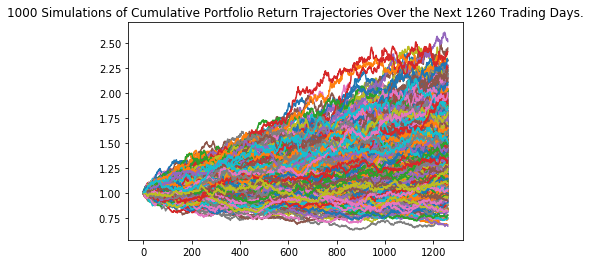

In [32]:
# Plot simulation outcomes
line_plot = MC_5Y.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_5Y_sim_plot.png", bbox_inches="tight")

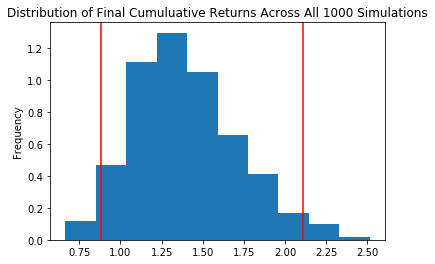

In [33]:
# Plot probability distribution and confidence intervals
dist_plot = MC_5Y.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_5Y = MC_5Y.summarize_cumulative_return()

# Print summary statistics
print(tbl_5Y)

count           1000.000000
mean               1.397853
std                0.314294
min                0.665380
25%                1.171879
50%                1.368142
75%                1.589138
max                2.513942
95% CI Lower       0.882540
95% CI Upper       2.110473
Name: 1260, dtype: float64


In [35]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_5Y = round(tbl_5Y[8]*20000,2)
ci_upper_5Y = round(tbl_5Y[9]*20000,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_5Y} and ${ci_upper_5Y}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 30 years will end within in the range of $17650.81 and $42209.46


### Ten Years Retirement Option

In [36]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
num_sims_10Y = 10

In [37]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10Y = MCSimulation(
    portfolio_data = ticker_data,
    num_simulation = 1000,
    num_trading_days = 252*num_sims_10Y
)

MC_10Y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999631,1.005814,1.007545,0.997802,1.009937,0.991192,1.010082,1.010020,0.998556,0.995173,...,0.996495,1.007092,0.999358,1.000255,1.000036,0.991609,1.002347,0.996997,0.996897,1.004840
2,0.992242,0.997797,0.995568,0.989591,1.012108,0.988715,1.013109,1.004647,1.002164,0.996262,...,0.996124,1.010140,1.009341,0.998024,0.996403,0.985426,0.996383,0.999090,1.004582,1.000190
3,1.000562,1.013576,0.983502,0.997498,1.020186,0.982662,1.011232,1.009198,1.009212,0.990743,...,0.994139,1.006536,1.011518,0.993908,0.994533,0.987752,0.998343,0.994666,0.989941,0.984932
4,0.996384,1.015943,0.989159,0.992807,1.016466,0.984658,1.013228,0.999889,1.013724,0.977361,...,0.985500,0.999106,1.013577,0.977529,0.993914,0.990793,0.997670,0.999615,0.999959,0.987007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.171382,1.597816,1.220582,2.882712,2.705676,1.748875,2.849141,1.545797,1.536130,2.236149,...,1.300903,1.945304,1.413253,0.956497,2.710521,2.098627,0.845663,1.757211,2.469339,1.268419
2517,2.182876,1.579454,1.215810,2.851683,2.678552,1.755354,2.842556,1.545653,1.540156,2.223295,...,1.303749,1.934820,1.408063,0.955594,2.698462,2.094666,0.849290,1.755318,2.476695,1.262585
2518,2.183661,1.586586,1.220127,2.855433,2.679695,1.753859,2.795626,1.527799,1.540234,2.238048,...,1.312264,1.941336,1.402599,0.943944,2.681825,2.106305,0.846215,1.743983,2.480238,1.270577
2519,2.163394,1.575809,1.228298,2.850942,2.672372,1.762290,2.817126,1.541601,1.543480,2.226450,...,1.314595,1.919251,1.396109,0.945220,2.665720,2.116709,0.848416,1.739021,2.484229,1.287562


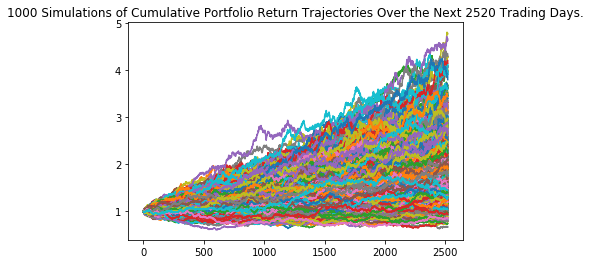

In [38]:
# Plot simulation outcomes
line_plot = MC_10Y.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_10Y_sim_plot.png", bbox_inches="tight")

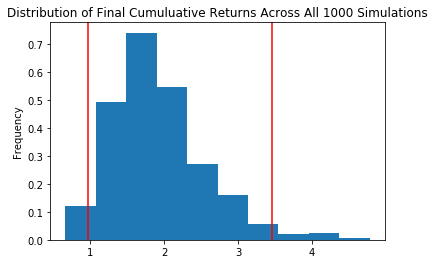

In [39]:
# Plot probability distribution and confidence intervals
dist_plot = MC_10Y.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')

In [40]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_10Y = MC_10Y.summarize_cumulative_return()

# Print summary statistics
print(tbl_10Y)

count           1000.000000
mean               1.918816
std                0.624465
min                0.668888
25%                1.487425
50%                1.814909
75%                2.240184
max                4.777651
95% CI Lower       0.972300
95% CI Upper       3.451324
Name: 2520, dtype: float64


In [41]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_10Y = round(tbl_10Y[8]*20000,2)
ci_upper_10Y = round(tbl_10Y[9]*20000,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_10Y} and ${ci_upper_10Y}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 30 years will end within in the range of $19445.99 and $69026.47
